In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data2.csv')

In [4]:
data.head()

,categoryId,view_count,likes,dislikes,comment_count,0,1,2,3,4,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,Life,1514614,156908,5855,35313,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Other,2381688,146739,2794,16549,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Entertainment,2038853,353787,2628,40221,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Entertainment,496771,23251,1856,7647,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Other,1123889,45802,964,2196,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data['Succes_ration'] = (data['likes']+data['comment_count'])/data['view_count'] 
data.columns

Index(['categoryId', 'view_count', 'likes', 'dislikes', 'comment_count', '0',
       '1', '2', '3', '4',
       ...
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       'Succes_ration'],
      dtype='object', length=2006)

In [6]:
import matplotlib.pyplot as plt

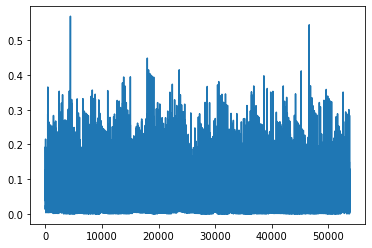

In [7]:
plt.plot(data['Succes_ration'])
plt.show()

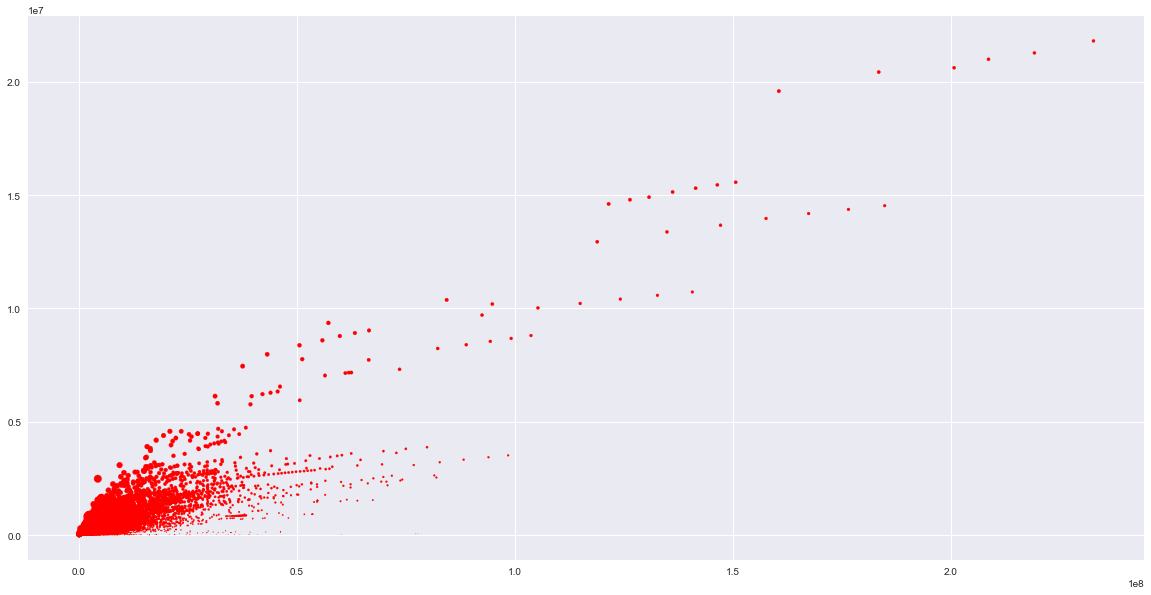

In [9]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 10))
plt.scatter(data['view_count'], data['likes']+data['comment_count'], s=data['Succes_ration']*100, c='r')
plt.show()

In [10]:
def succes_r(col):
    if col>=0.035:
        return 1
    else :
        return 0

In [11]:
data['Succes_ration'] = data['Succes_ration'].apply(succes_r)

In [12]:
data['Succes_ration'].value_counts()

1    37763
0    16028
Name: Succes_ration, dtype: int64

In [14]:
data.drop(['categoryId', 'view_count', 'likes','dislikes', 'comment_count'], axis=1, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,Succes_ration
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
Y = data['Succes_ration']
data.drop(['Succes_ration'], inplace=True, axis = 1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, Y)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

D:\programs\conda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
lg.score(x_test, y_test)

0.8941850089232599